<a href="https://colab.research.google.com/github/Kassandracw8/Predicting-Sales/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '/content/sales_predictions - sales_predictions.csv'
sales_predictions = pd.read_csv('/content/sales_predictions - sales_predictions.csv')

In [4]:
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales_predictions2 = sales_predictions.copy()

In [6]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data Cleaning**

In [7]:
sales_predictions.shape

(8523, 12)



*   There are 8523 rows, 12 columns
  



Checking the data types

In [8]:
 data_types = sales_predictions.dtypes
 data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are 3 different data types object, float64, and int64.

In [9]:
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
 for col in str_cols:
   print(f'- {col}:')
   print(sales_predictions[col].value_counts(dropna=False))
   print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [11]:
sales_predictions['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
sales_predictions.replace(['low fat','LF'], ['Low Fat', 'Low Fat'], inplace = True)
sales_predictions.replace({'low fat': 'Low Fat', 'LF': 'Low Fat'}, inplace = True)

In [13]:
sales_predictions.replace(['reg'], ['Regular'], inplace = True)

In [14]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
sales_predictions.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [16]:
sales_predictions.duplicated().sum()

0

In this data set there are not any duplicates.

In [17]:
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
sales_predictions.isna().sum() / len(sales_predictions) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [19]:
sales_predictions.dropna(inplace=True)

In [20]:
# Outlet Size
# missing_outlet_size = sales_predictions.Outlet_Size.isna()
# missing_outlet_size
# missing_item_weight = sales_predictions.Item_Weight.isna()
# outlet_size = sales_predictions['Outlet_Size'].value_counts()
# missing_iteam_weight
# sales_predictions['Item_Weight'].value_counts()

In [21]:
sales_predictions['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [22]:
sales_predictions.replace(['High'], ['Large'], inplace = True)
sales_predictions.replace({'High': 'Large'}, inplace = True)

In [23]:
sales_predictions['Outlet_Size'].value_counts()

Small     1860
Medium    1858
Large      932
Name: Outlet_Size, dtype: int64



*   Replace the missing values with Zero




In [24]:
most_common_size = sales_predictions['Outlet_Size'].mode()
sales_predictions['Outlet_Size'].fillna(most_common_size, inplace=True)

In [25]:
Item_Weight_mean = sales_predictions['Item_Weight'].mean()
Item_Weight_max = sales_predictions['Item_Weight'].max()
Item_Weight_min = sales_predictions['Item_Weight'].min()
Item_Weight_mean
Item_Weight_max
Item_Weight_min

4.555

In [26]:
median_weight = sales_predictions['Item_Weight'].median()
sales_predictions['Item_Weight'].fillna(median_weight, inplace=True)
sales_predictions.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
sales_predictions.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.00,4650.00,4650.00,4650.00,4650.00
mean,12.90,0.06,141.72,1999.19,2272.04
std,4.67,0.04,62.42,7.39,1497.96
min,4.56,0.00,31.49,1987.00,69.24
25%,8.77,0.03,94.41,1997.00,1125.20
50%,12.65,0.05,142.98,1999.00,1939.81
75%,17.00,0.09,186.61,2004.00,3111.62
max,21.35,0.19,266.89,2009.00,10256.65


In [28]:
stats = sales_predictions.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
min,4.555000,0.000000,31.490000,1987.000000,69.243200
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [29]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [30]:
sales_predictions['Item_Outlet_Sales'].value_counts()

1342.2528    11
1438.1280    11
958.7520     10
703.0848     10
1845.5976     9
             ..
256.3330      1
3941.5360     1
3858.9768     1
5496.8448     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 2449, dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

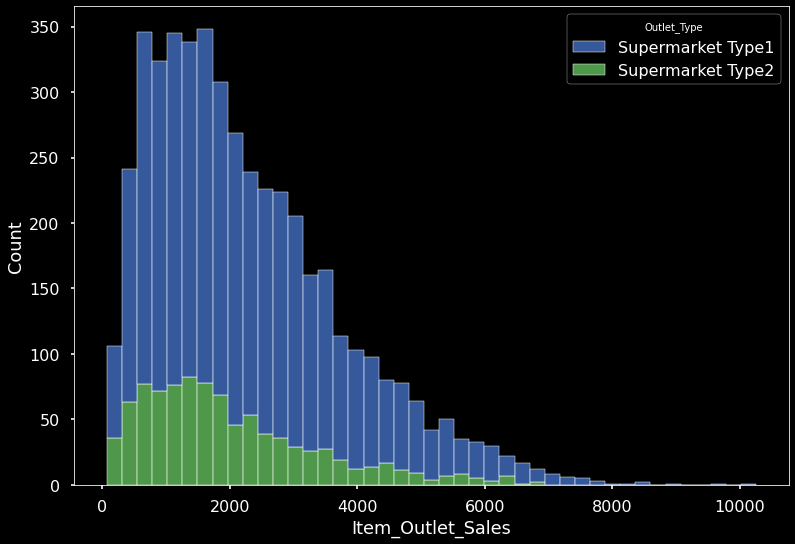

In [31]:
sns.histplot(data = sales_predictions, x= "Item_Outlet_Sales",hue = "Outlet_Type", multiple = "stack")

Supermarket Type 1 had high number of sales and a few in 10,000 catgeory. Supermarket Type 2 does not have the same sales as type 1. Supermarket does not have any values in the 10,000.

<AxesSubplot:>

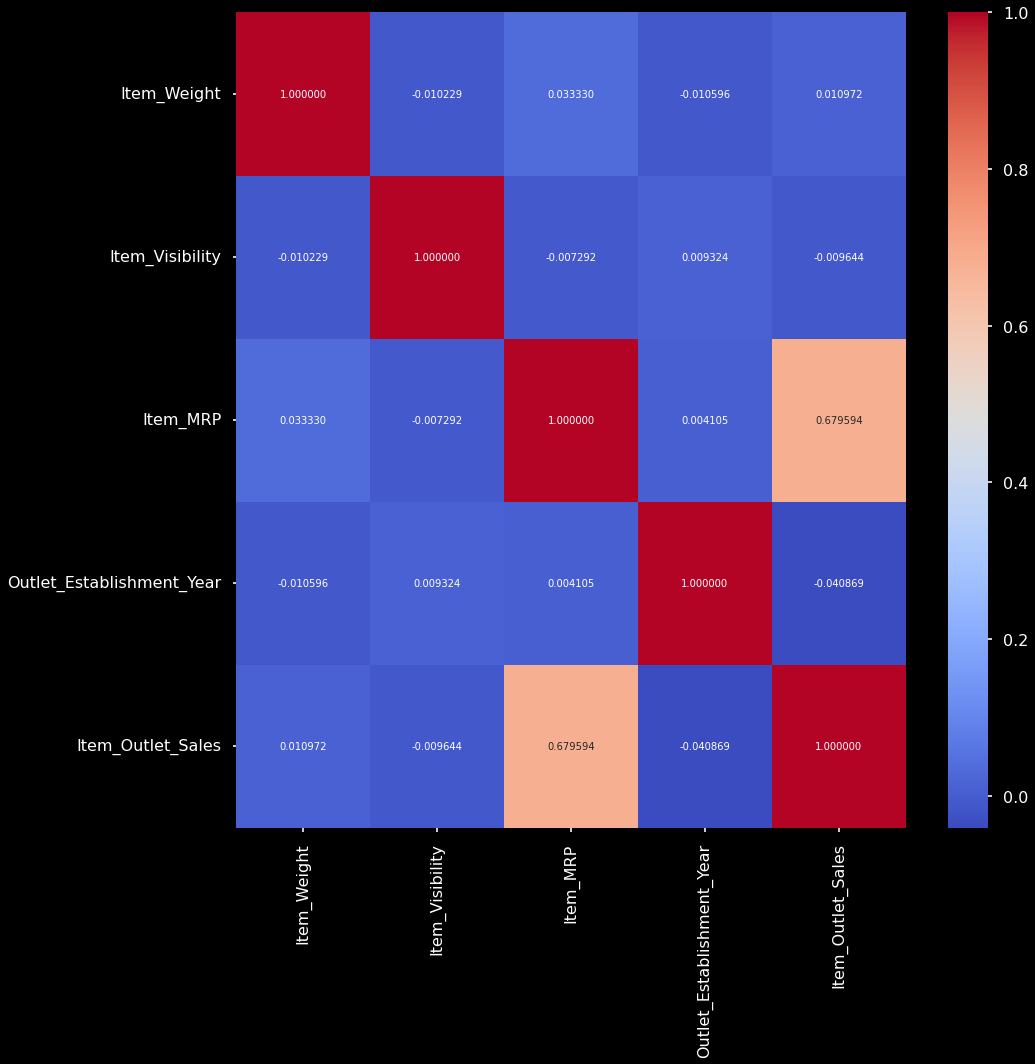

In [32]:
plt.figure(figsize= (15,15))
sns.heatmap(sales_predictions.corr(),cmap = 'coolwarm', annot= True, fmt= '2f')

This graph show the potential correlations with Item Outlet Sales.

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Outlet_Type'>

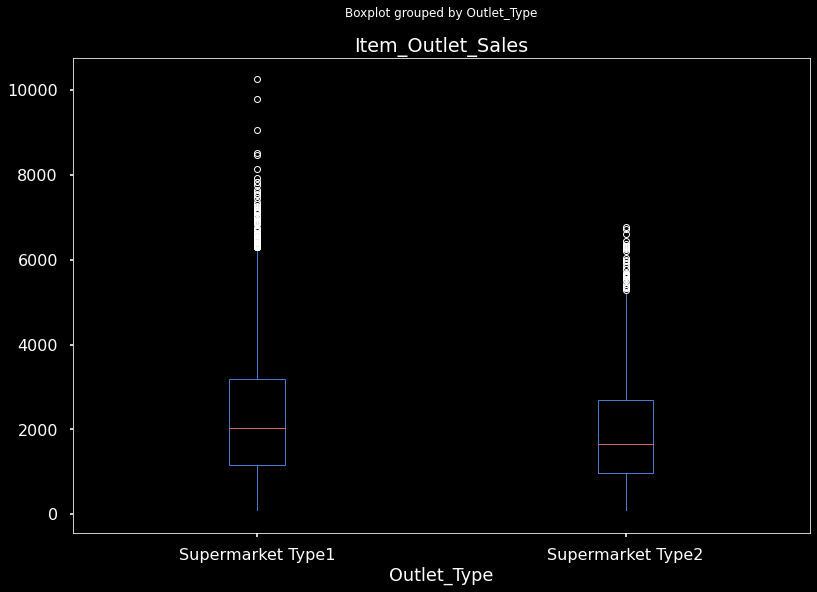

In [33]:
sales_predictions.boxplot(by='Outlet_Type', column='Item_Outlet_Sales', grid=False)

Supermarket Type 1 is over 50% in sales and supermarket 2 is right at 50% in sales.

**Project 1 Part 4**


*   which items had the most visibilty 
*   Which food items  sold the most







In [34]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [44]:
means = sales_predictions.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False)
means

Item_Type
Seafood                  0.076063
Breakfast                0.074611
Dairy                    0.066709
Starchy Foods            0.064550
Canned                   0.063863
Breads                   0.061970
Snack Foods              0.061934
Frozen Foods             0.061808
Fruits and Vegetables    0.061589
Baking Goods             0.060733
Hard Drinks              0.059529
Soft Drinks              0.058806
Meat                     0.058088
Household                0.056251
Others                   0.050557
Health and Hygiene       0.050321
Name: Item_Visibility, dtype: float64

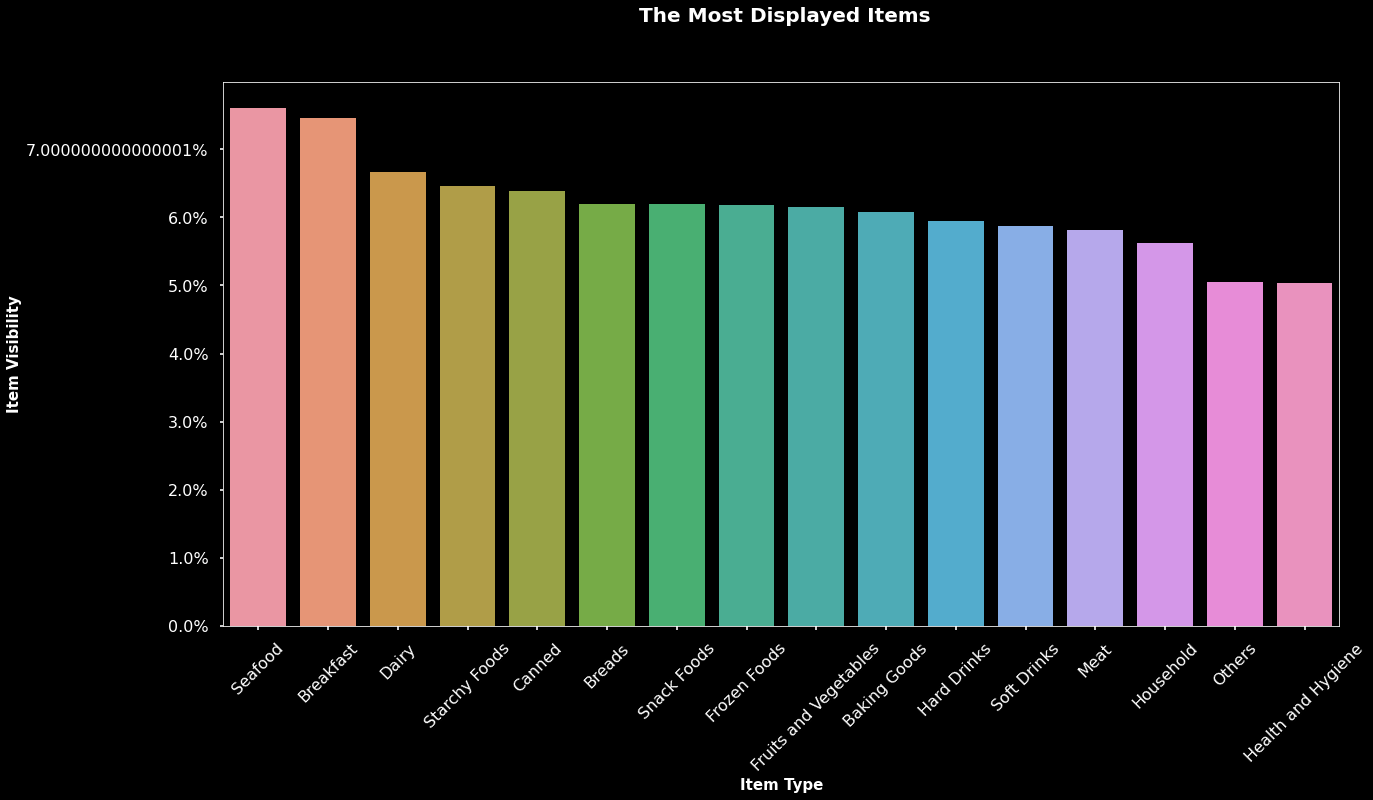

In [47]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_predictions,x='Item_Type', 
                 y = 'Item_Visibility', 
                 order = means.index, 
                 ci = None)
plt.xticks(rotation = 45)
ax.set_title(' The Most Displayed Items', 
             fontsize = 20, 
             fontweight = 'bold',
             y=1.1);
ax.set_xlabel('Item Type', 
              fontsize = 15, 
              fontweight = 'bold')
ax.set_ylabel('Item Visibility', 
              fontsize = 15, 
              fontweight = 'bold');

def one_percent(x,pos):
  """function for use with matplotlib FuncFormatter - format item visibility in percentage"""
  return f'{x*100}%'


price_fmt_percent = FuncFormatter(one_percent)

ax.yaxis.set_major_formatter(price_fmt_percent)

**The Items that had the most visibilty **


*   Seafood
*   Breakfast

**The items that had the lesat**


*   Health and Hygiene
*   Others





In [37]:
means2 = sales_predictions.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2

Item_Type
Seafood                  2782.236970
Starchy Foods            2483.778379
Snack Foods              2391.146609
Breads                   2389.702474
Household                2386.554752
Dairy                    2337.420556
Fruits and Vegetables    2312.703005
Meat                     2250.096708
Hard Drinks              2233.275299
Frozen Foods             2222.011887
Canned                   2205.210750
Breakfast                2203.166638
Others                   2194.191457
Health and Hygiene       2138.071282
Soft Drinks              2050.338007
Baking Goods             2046.798187
Name: Item_Outlet_Sales, dtype: float64

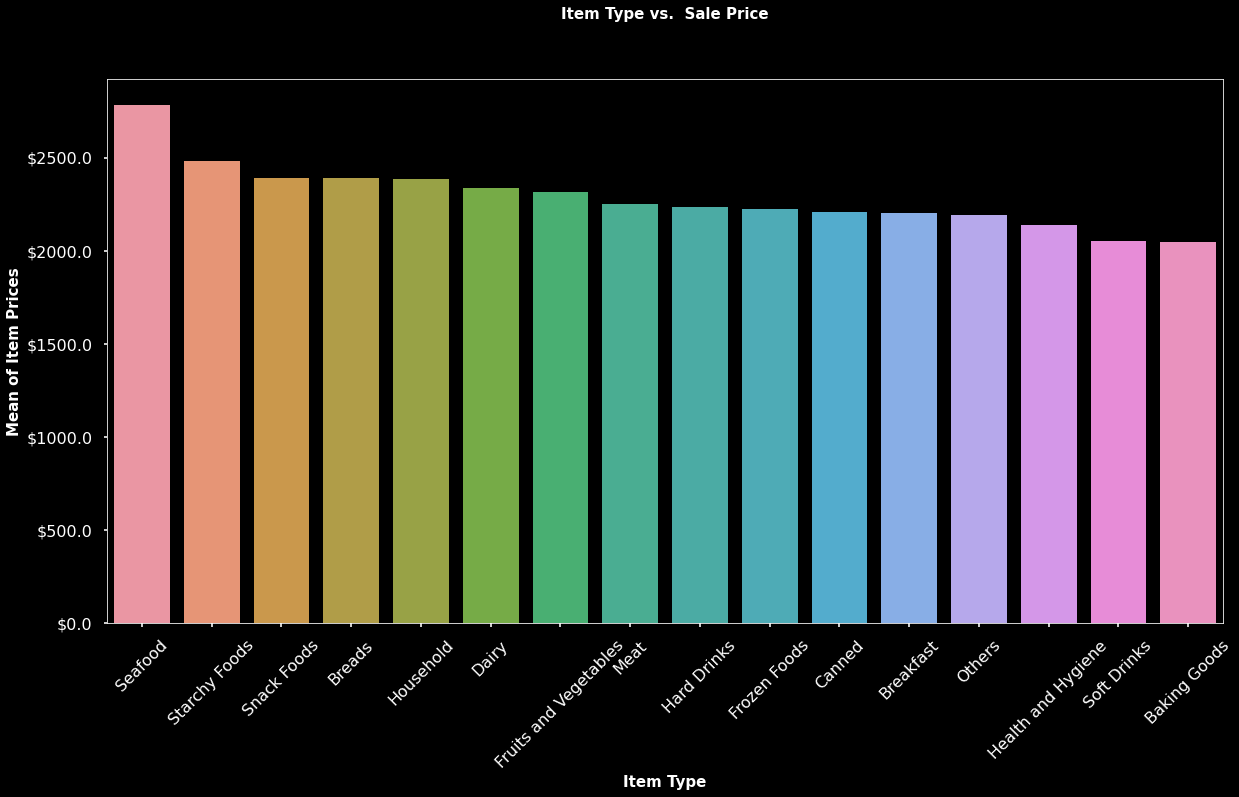

In [48]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_predictions,x='Item_Type', y = 'Item_Outlet_Sales', order = means2.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Item Type vs.  Sale Price', 
             fontsize = 15, 
             fontweight = 'bold',
             y=1.1);
ax.set_xlabel('Item Type', 
              fontsize = 15, 
              fontweight = 'bold')
ax.set_ylabel('Mean of Item Prices', 
              fontsize = 15, 
              fontweight = 'bold');

def one_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in thousands"""
  return f'${x}'

price_fmt_1k = FuncFormatter(one_k)

ax.yaxis.set_major_formatter(price_fmt_1k)

**The items that were sold**


*   Seafood 
*   Starchy Foods

**The Items sold the least**



*   Soft Drinks
*   Baking Goods


